<a href="https://colab.research.google.com/github/Jaskirat1/AIT_SVM_projects/blob/main/SVM_human_activity_reco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pylab  as pl 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.utils import shuffle 
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

In [2]:
test = pd.read_csv('test.csv')

In [3]:
test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [4]:
train = pd.read_csv('train.csv')

In [5]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [6]:
train.shape

(7352, 563)

In [7]:
test.shape

(2947, 563)

In [8]:
train.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [10]:
test.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [12]:
train_outcome = pd.crosstab(index = train['Activity'], columns ='count')

In [13]:
print(train_outcome)

col_0               count
Activity                 
LAYING               1407
SITTING              1286
STANDING             1374
WALKING              1226
WALKING_DOWNSTAIRS    986
WALKING_UPSTAIRS     1073


In [15]:
train['Activity'].sample()

3714    LAYING
Name: Activity, dtype: object

In [16]:
var = train['Activity'].value_counts()

In [17]:
var

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [18]:
df = pd.DataFrame({'labels': var.index, 'values': var.values})

In [19]:
df

,labels,values
0,LAYING,1407
1,STANDING,1374
2,SITTING,1286
3,WALKING,1226
4,WALKING_UPSTAIRS,1073
5,WALKING_DOWNSTAIRS,986


In [20]:
labels = df['labels']

In [23]:
labels

0                LAYING
1              STANDING
2               SITTING
3               WALKING
4      WALKING_UPSTAIRS
5    WALKING_DOWNSTAIRS
Name: labels, dtype: object

In [21]:
sizes= df['values']

In [22]:
sizes

0    1407
1    1374
2    1286
3    1226
4    1073
5     986
Name: values, dtype: int64

In [24]:
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'cyan', 'lightpink']

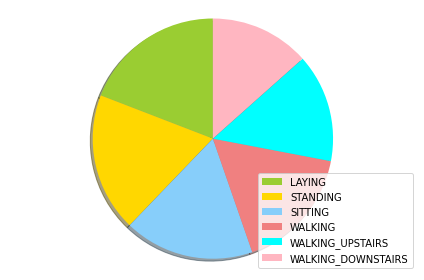

In [32]:
patches, text = plt.pie(sizes, colors = colors, shadow = True, startangle = 90, pctdistance = 1.1, labeldistance=1.2)
plt.legend(patches, labels, loc = 'best')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [34]:
X_train = pd.DataFrame(train.drop(['Activity', 'subject'], axis = 1))
Y_trian_label = train.Activity.values.astype(object)


In [36]:
X_train.shape

(7352, 561)

In [37]:
Y_trian_label.shape

(7352,)

In [38]:
X_test = pd.DataFrame(test.drop(['Activity', 'subject'], axis = 1))
Y_test_label = test.Activity.values.astype(object)

In [39]:
X_test.shape

(2947, 561)

In [40]:
Y_test_label.shape

(2947,)

Transforming non numerical labels into numerical labels

In [41]:
from sklearn import preprocessing

In [42]:
encoder = preprocessing.LabelEncoder()

In [45]:
encoder.fit(Y_trian_label)

LabelEncoder()

In [47]:
Y_train = encoder.transform(Y_trian_label)

In [48]:
encoder.fit(Y_test_label)

LabelEncoder()

In [49]:
Y_test = encoder.transform(Y_test_label)

In [50]:
#Total number of continous and Categorical features in the training set

num_cols = X_train._get_numeric_data().columns
print('Number of numeric features:', num_cols.size)

Number of numeric features: 561


In [51]:
names_of_predicators = list(X_train.columns.values)

In [53]:
#names_of_predicators

In [54]:
from sklearn.preprocessing import StandardScaler

In [56]:
scalar = StandardScaler()


In [57]:
X_trian_scaled = scalar.fit_transform(X_train)

In [59]:
X_trian_scaled

array([[ 0.20064157, -0.0636826 , -0.41962845, ..., -0.68721921,
         0.40794614, -0.00756789],
       [ 0.05594788,  0.03148567, -0.25390836, ..., -0.694138  ,
         0.40911698,  0.00787517],
       [ 0.07351535, -0.04341648, -0.07629468, ..., -0.702239  ,
         0.4102883 ,  0.02650234],
       ...,
       [-0.01566765,  0.0167814 ,  1.13222107, ..., -0.56584847,
         0.64059683,  0.34870928],
       [ 0.21586648, -0.02812252, -0.86770988, ..., -0.57766781,
         0.63147758,  0.29327564],
       [ 1.09620157,  0.12919873, -1.67268082, ..., -0.57392691,
         0.63274259,  0.33396081]])

In [60]:
X_test_scaled = scalar.fit_transform(X_test)

In [61]:
X_test_scaled

array([[-0.2777081 , -0.21063123,  2.19307573, ..., -0.40479042,
         0.62272321, -0.0383485 ],
       [ 0.19865964,  0.18259066, -0.25026383, ..., -0.36173867,
         0.63673075, -0.14570918],
       [ 0.02458676, -0.31805537, -0.22848456, ..., -0.37093228,
         0.63284514, -0.12685534],
       ...,
       [ 1.25445818,  1.86244113, -0.17318039, ..., -0.27780151,
         0.61556116,  0.95227139],
       [-0.60108793,  1.41138509,  0.27812868, ..., -0.28636876,
         0.58565426,  0.97869501],
       [-1.98758645, -0.02226443, -0.66991444, ..., -0.28707909,
         0.58304691,  0.98093374]])

In [63]:
X_trian_scaled.shape

(7352, 561)

In [64]:
X_test_scaled.shape

(2947, 561)

In [65]:
#create the parameter grid based on the results of random search
params_grid = [{'kernel':['rbf'], 'gamma':[1e-3, 1e-4], 'C':[1,10,100,1000]}, {'kernel':['linear'], 'C':[1,10,100,1000]}]


In [66]:
svm_model = GridSearchCV(SVC(), params_grid, cv = 5)


In [67]:
svm_model

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

In [68]:
svm_model.fit(X_trian_scaled, Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

In [69]:
print("Best score for training data:", svm_model.best_score_)

Best score for training data: 0.938255432696532


In [70]:
print('Best C:', svm_model.best_estimator_.C)

Best C: 1000


In [71]:
print('Best Gamma:', svm_model.best_estimator_.gamma)

Best Gamma: 0.0001


In [72]:
final_model = svm_model.best_estimator_


In [73]:
final_model

SVC(C=1000, gamma=0.0001)

In [74]:
Y_pred = final_model.predict(X_test_scaled)

In [75]:
Y_pred

array([2, 2, 2, ..., 5, 5, 5])

In [76]:
Y_pred_label = list(encoder.inverse_transform(Y_pred))

In [78]:
#Y_pred_label

In [83]:
#making the confusion matrix
print('Confusion Matrix:\n', confusion_matrix(Y_test_label, Y_pred_label))

Confusion Matrix:
 [[537   0   0   0   0   0]
 [  1 446  43   0   0   1]
 [  0  20 512   0   0   0]
 [  0   0   0 485   5   6]
 [  0   0   0   1 405  14]
 [  0   0   0   8   4 459]]


In [84]:
print('Classification Report: \n', classification_report(Y_test_label, Y_pred_label))

Classification Report: 
                     precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.96      0.91      0.93       491
          STANDING       0.92      0.96      0.94       532
           WALKING       0.98      0.98      0.98       496
WALKING_DOWNSTAIRS       0.98      0.96      0.97       420
  WALKING_UPSTAIRS       0.96      0.97      0.97       471

          accuracy                           0.97      2947
         macro avg       0.97      0.96      0.96      2947
      weighted avg       0.97      0.97      0.97      2947



In [86]:
print('Trianing set score for SVM: %f' % final_model.score(X_trian_scaled, Y_train))

Trianing set score for SVM: 0.996872


In [87]:
print('Testing set score for SVM: %f' % final_model.score(X_test_scaled, Y_test))

Testing set score for SVM: 0.965049
